<img src="https://www.vectorlogo.zone/logos/stackoverflow/stackoverflow-ar21.svg"  width="700" height="100">

# 1. BUSINESS PROBLEM

## 1.1 Description
<p>
Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.<br />
<br />
Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.<br />
<br />
</p>

## 1.2 Problem Statemtent
The task is to predict the tags , given only the question text and its title. The dataset contains content from disparate stack exchange sites, containing a mix of both technical and non-technical questions.

## 1.3 Real World / Business Objectives and Constraints
-  Predict as many tags as possible with high precision and recall.  
-  Incorrect tags could impact customer experience on StackOverflow.  
-  No strict latency constraints.  

# 2. MACHINE LEARNING PROBLEM

## 2.1 Data
### 2.1.1 Data Overview
Source: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data
<br>
All of the data is in 2 files: Train and Test.<br />
<pre>
<b>Train.csv</b> contains 4 columns: Id,Title,Body,Tags.<br />
<b>Test.csv</b> contains the same columns but without the Tags, which you are to predict.<br />
<b>Size of Train.csv</b> - 6.75GB<br />
<b>Size of Test.csv</b> - 2GB<br />
<b>Number of rows in Train.csv</b> = 6034195<br />
</pre>

Dataset contains 6,034,195 rows. The columns in the table are:<br />
<pre>
<b>Id</b> - Unique identifier for each question<br />
<b>Title</b> - The question's title<br />
<b>Body</b> - The body of the question<br />
<b>Tags</b> - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')<br />
</pre>

### 2.1.2 Example Data point
<pre>
<b>Title</b>:  Implementing Boundary Value Analysis of Software Testing in a C++ program?
<b>Body </b>: <pre><code>
        #include&lt;
        iostream&gt;\n
        #include&lt;
        stdlib.h&gt;\n\n
        using namespace std;\n\n
        int main()\n
        {\n
                 int n,a[n],x,c,u[n],m[n],e[n][4];\n         
                 cout&lt;&lt;"Enter the number of variables";\n         cin&gt;&gt;n;\n\n         
                 cout&lt;&lt;"Enter the Lower, and Upper Limits of the variables";\n         
                 for(int y=1; y&lt;n+1; y++)\n         
                 {\n                 
                    cin&gt;&gt;m[y];\n                 
                    cin&gt;&gt;u[y];\n         
                 }\n         
                 for(x=1; x&lt;n+1; x++)\n         
                 {\n                 
                    a[x] = (m[x] + u[x])/2;\n         
                 }\n         
                 c=(n*4)-4;\n         
                 for(int a1=1; a1&lt;n+1; a1++)\n         
                 {\n\n             
                    e[a1][0] = m[a1];\n             
                    e[a1][1] = m[a1]+1;\n             
                    e[a1][2] = u[a1]-1;\n             
                    e[a1][3] = u[a1];\n         
                 }\n         
                 for(int i=1; i&lt;n+1; i++)\n         
                 {\n            
                    for(int l=1; l&lt;=i; l++)\n            
                    {\n                 
                        if(l!=1)\n                 
                        {\n                    
                            cout&lt;&lt;a[l]&lt;&lt;"\\t";\n                 
                        }\n            
                    }\n            
                    for(int j=0; j&lt;4; j++)\n            
                    {\n                
                        cout&lt;&lt;e[i][j];\n                
                        for(int k=0; k&lt;n-(i+1); k++)\n                
                        {\n                    
                            cout&lt;&lt;a[k]&lt;&lt;"\\t";\n               
                        }\n                
                        cout&lt;&lt;"\\n";\n            
                    }\n        
                 }    \n\n        
                 system("PAUSE");\n        
                 return 0;    \n
        }\n
        </code></pre>\n\n
        <p>The answer should come in the form of a table like</p>\n\n
        <pre><code>       
        1            50              50\n       
        2            50              50\n       
        99           50              50\n       
        100          50              50\n       
        50           1               50\n       
        50           2               50\n       
        50           99              50\n       
        50           100             50\n       
        50           50              1\n       
        50           50              2\n       
        50           50              99\n       
        50           50              100\n
        </code></pre>\n\n
        <p>if the no of inputs is 3 and their ranges are\n
        1,100\n
        1,100\n
        1,100\n
        (could be varied too)</p>\n\n
        <p>The output is not coming,can anyone correct the code or tell me what\'s wrong?</p>\n'
<b>Tags </b>: 'c++ c'
</pre>

## 2.2 Mapping the real-world problem to a Machine Learning Problem
### 2.2.1 Type of Machine Learning Problem
<p> It is a multi-label classification problem  <br>
<b>Multi-label Classification</b>: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A question on Stackoverflow might be about any of C, Pointers, FileIO and/or memory-management at the same time or none of these.
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/25230542/Screen-Shot-2017-08-20-at-12.20.24-AM.png" width="500" height="100">
<br>
</p>

### 2.2.2 Performance metric
-  <b>Micro-Averaged F1-Score (Mean F Score) </b>: 
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

<i>F1 = 2 * (precision * recall) / (precision + recall)</i><br>

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. <br>
-  <b>'Micro f1 score': </b><br>
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance.
<br>
-  <b>'Macro f1 score': </b><br>
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.
<br>
-  <b> Hamming loss </b>: The Hamming loss is the fraction of labels that are incorrectly predicted. <br>
-  <b> Jaccard Similarity Score </b>: Jaccard Similarity Score is defined as the number of correctly predicted labels divided by the union of predicted and true labels. <br>

# 3. EXPLORATORY DATA ANALYSIS

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from wordcloud import WordCloud
import re
import os

from IPython.display import Image
from IPython.core.display import HTML 


import sqlite3
from sqlalchemy import create_engine
from datetime import datetime as dt

#nltk packages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

#sklearn packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.metrics import hamming_loss,jaccard_similarity_score,classification_report

#skmultilearn packages
# from skmultilearn.adapt import mlknn
# from skmultilearn.problem_transform import ClassifierChain
# from skmultilearn.problem_transform import BinaryRelevance
# from skmultilearn.problem_transform import LabelPowerset

from sklearn.externals import joblib

## 3.1 Data Loading and Cleaning
### 3.1.1 Using Pandas with SQLite to Load the data

In [57]:
if os.path.isfile("Train.db"):
    print("Lets start with Stack Overflow case study.")
else:
    print("\33[1m---------------------CREATING DB FILE FROM CSV-----------------------------\33[0m")
    start = dt.now()
    disk_engine = create_engine("sqlite:///Train.db")
    chunksize = 50000
    index_start = 1
    j = 0
    for df in pd.read_csv("Train.csv",chunksize = chunksize, iterator= True):
        df.index += index_start
        j += 1
        df.to_sql("final",disk_engine,if_exists= "append")
        indext_start= df.index[-1]+1
        print("{} rows completed.".format(j * chunksize))
    print("Time taken to run this cell :",dt.now() - start)

Lets start with Stack Overflow case study.


### 3.1.2 Counting the number of rows

In [2]:
if os.path.isfile("Train.db"):
    start = dt.now()
    con = sqlite3.connect("Train.db")
    df_train = pd.read_sql_query("""SELECT count(*) FROM final""",con)
    num_rows = df_train['count(*)'].values[0]
    print("Number of rows/data points in the database file: ",num_rows)
    con.close
    
    print("Time taken to run this cell :",dt.now() - start)
else:
    print("Train.db doesnot exist")

Number of rows/data points in the database file:  6034195
Time taken to run this cell : 0:00:09.813525


### 3.1.3 Checking for duplicates

In [3]:
if os.path.isfile("Train.db"):
    start = dt.now()
    con = sqlite3.connect("Train.db")
    df_no_dup = pd.read_sql_query("""SELECT Title, Body, Tags, count(*) as cnt_dup FROM final GROUP BY Title, Body, Tags""",con)
    num_dup = num_rows - df_no_dup.shape[0]
    percent_dup = (num_dup/num_rows) * 100
    print("Number of duplicate entries :",num_dup)
    print("Percentage of duplicate questions/entries : {} %".format(percent_dup))
    con.close()
    print("Time taken to run this cell :",dt.now() - start)
else:
    print("Train.db doesnot exist")

Number of duplicate entries : 1827881
Percentage of duplicate questions/entries : 30.29204392632323 %
Time taken to run this cell : 0:01:28.107226


In [4]:
df_no_dup.head(10)

,Title,Body,Tags,cnt_dup
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2
5,Better way to update feed on FB with PHP SDK,<p>I am a novice with the Facebook API. I have...,facebook api facebook-php-sdk,1
6,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web,3
7,"""SQL Injection"" issue preventing correct for...",<p>So I've been checking everything I can thin...,php forms,1
8,Countable subadditivity of the Lebesgue measure,<p>Let $\lbrace F_n \rbrace$ be a sequence of ...,real-analysis measure-theory,3
9,HQL equivalent to this Sql Query,"<pre><code>select part.PaId,part.PaName,part.P...",hibernate hql,2


### 3.1.4 Number of times each question appeared in our database

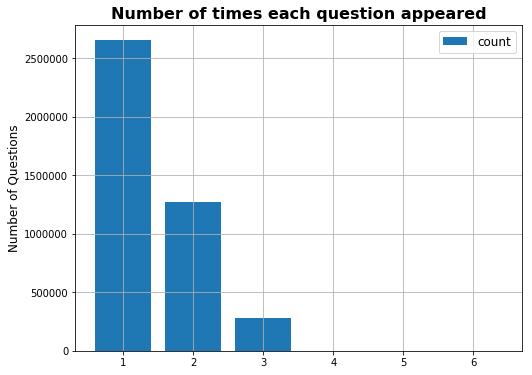

Duplicate Times  Number of Questions
              1              2656283
              2              1272336
              3               277575
              4                   90
              5                   25
              6                    5


In [5]:
dup_entries = pd.DataFrame(df_no_dup["cnt_dup"].value_counts().reset_index().values, columns = ["Duplicate Times","Number of Questions"])

plt.figure(figsize = (8,6))
plt.bar(dup_entries['Duplicate Times'],dup_entries['Number of Questions'],label = "count")
plt.title("Number of times each question appeared", fontsize = 16, fontweight = 'bold')
plt.ylabel("Number of Questions",fontsize = 12)
plt.legend(fontsize = 12)
plt.grid(True)
plt.show()

print(dup_entries.to_string(index=False))

##  3.2 Analysis of Tags
### 3.2.1 Number of questions with no tags

In [6]:
print("Number of questions with no tags: ",df_no_dup['Tags'].isnull().sum())
df_no_dup[df_no_dup.isnull().any(axis=1)]

Number of questions with no tags:  7


,Title,Body,Tags,cnt_dup
777547,Do we really need NULL?,<blockquote>\n <p><strong>Possible Duplicate:...,None,1
962680,Find all values that are not null and not in a...,<p>I am running into a problem which results i...,None,1
1126558,Handle NullObjects,<p>I have done quite a bit of research on best...,None,1
1256102,How do Germans call null,"<p>In german null means 0, so how do they call...",None,1
2430668,Page cannot be null. Please ensure that this o...,<p>I get this error when i remove dynamically ...,None,1
3329907,"What is the difference between NULL and ""0""?","<p>What is the difference from NULL and ""0""?</...",None,1
3551594,a bit of difference between null and space,<p>I was just reading this quote</p>\n\n<block...,None,2


In [7]:
df_no_dup = df_no_dup.dropna(subset = ['Tags'])

### 3.2.2 Number of tags per question

In [8]:
df_no_dup['tag_count'] = df_no_dup["Tags"].apply(lambda x: len(x.split(" ")))
df_no_dup.head(10)

,Title,Body,Tags,cnt_dup,tag_count
0,Implementing Boundary Value Analysis of S...,<pre><code>#include&lt;iostream&gt;\n#include&...,c++ c,1,2
1,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding,1,3
2,Dynamic Datagrid Binding in Silverlight?,<p>I should do binding for datagrid dynamicall...,c# silverlight data-binding columns,1,4
3,java.lang.NoClassDefFoundError: javax/serv...,"<p>I followed the guide in <a href=""http://sta...",jsp jstl,1,2
4,java.sql.SQLException:[Microsoft][ODBC Dri...,<p>I use the following code</p>\n\n<pre><code>...,java jdbc,2,2
5,Better way to update feed on FB with PHP SDK,<p>I am a novice with the Facebook API. I have...,facebook api facebook-php-sdk,1,3
6,btnAdd click event opens two window after r...,<p>i m opening window(search.aspx)using below ...,javascript asp.net web,3,3
7,"""SQL Injection"" issue preventing correct for...",<p>So I've been checking everything I can thin...,php forms,1,2
8,Countable subadditivity of the Lebesgue measure,<p>Let $\lbrace F_n \rbrace$ be a sequence of ...,real-analysis measure-theory,3,2
9,HQL equivalent to this Sql Query,"<pre><code>select part.PaId,part.PaName,part.P...",hibernate hql,2,2


In [9]:
start = dt.now()

if os.path.isfile("train_no_dup.db"):
    print("Lets start with Stack Overflow case study.")
else:
    disk_dup = create_engine("sqlite:///train_no_dup.db")
    df_no_dup.to_sql("no_dup_train",disk_dup,chunksize=10000)
    
print("Time taken to run this cell :",dt.now() - start)

Time taken to run this cell : 0:43:45.466710


In [10]:
if os.path.isfile('train_no_dup.db'):
    start = dt.now()
    con = sqlite3.connect('train_no_dup.db')
    tag_data = pd.read_sql_query("""SELECT Tags FROM no_dup_train""", con)
    con.close()

    # Let's now drop unwanted column.
    #tag_data.drop(tag_data.index[0], inplace=True)
    print("Time taken to run this cell :", dt.now() - start)
else:
    print("Please download the train.db file from drive or run the above cells to genarate train.db file")

Time taken to run this cell : 0:00:17.728986


### 3.2.3 Total number of unique tags

In [11]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tags_vector = vectorizer.fit_transform(tag_data['Tags'])
print("Number of questions :",tags_vector.shape[0])
print("Number of unique Tags :",tags_vector.shape[1])

Number of questions : 4206307
Number of unique Tags : 42048


In [12]:
tags_names = vectorizer.get_feature_names()
print("Some of the sample Tags are :",tags_names[20:30])

Some of the sample Tags are : ['.mobi', '.mov', '.net', '.net-1.0', '.net-1.1', '.net-2.0', '.net-3.0', '.net-3.5', '.net-4.0', '.net-4.0-beta-2']


### 3.2.4 Number of times a tag appeared

In [13]:
freq = tags_vector.sum(axis = 0).A1
result = dict(zip(tags_names,freq))

In [14]:
if not os.path.isfile("tags_freq_dict.csv"):
    start = dt.now()
    with open('tags_freq_dict.csv', 'w') as csv_file:
        writer = csv.writer(csv_file)
        for key, value in result.items():
            writer.writerow([key, value])
    print("Time taken to run this cell :",dt.now() - start)
tags_freq = pd.read_csv("tags_freq_dict.csv", names=['Tag', 'Frequency'])
tags_freq.head(10)

Time taken to run this cell : 0:00:00.138860


,Tag,Frequency
0,.a,18
1,.app,37
2,.asp.net-mvc,1
3,.aspxauth,21
4,.bash-profile,138
5,.class-file,53
6,.cs-file,14
7,.doc,47
8,.drv,1
9,.ds-store,8


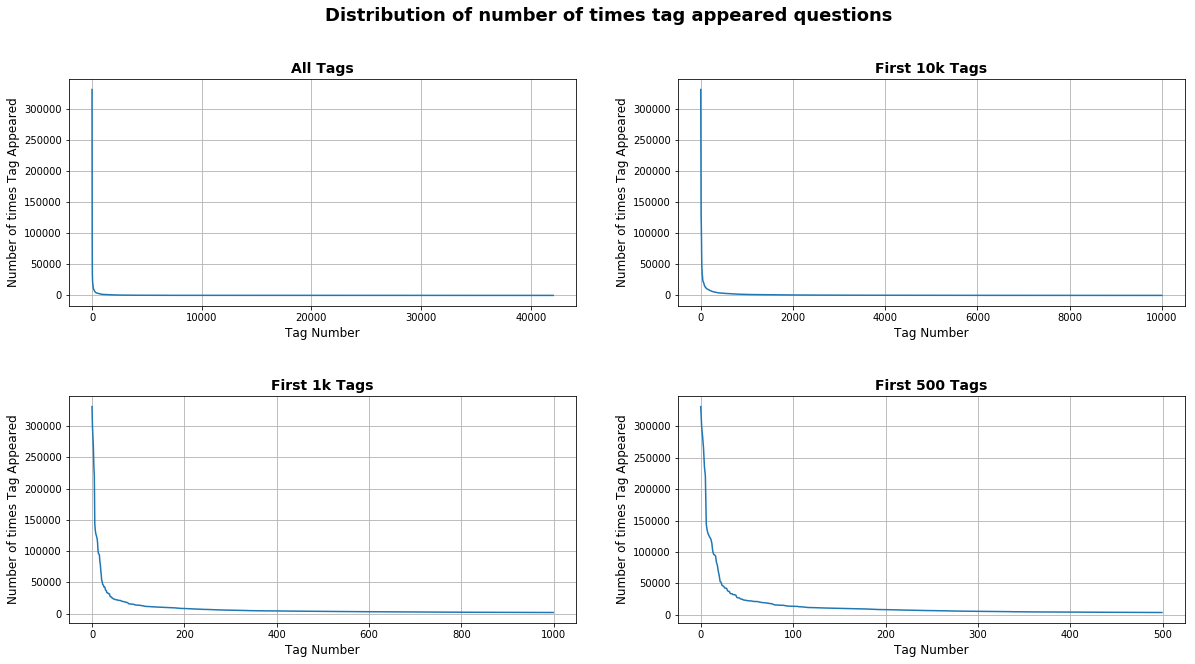

In [15]:
tags_freq_sorted = tags_freq.sort_values(['Frequency'], ascending = False)

plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.plot(tags_freq_sorted['Frequency'].values)
plt.title("All Tags", fontsize = 14, fontweight = 'bold')
plt.xlabel("Tag Number", fontsize = 12)
plt.ylabel("Number of times Tag Appeared", fontsize = 12)
plt.grid(True)

plt.subplot(2,2,2)
plt.plot(tags_freq_sorted['Frequency'][0:10000].values)
plt.title("First 10k Tags", fontsize = 14, fontweight = 'bold')
plt.xlabel("Tag Number", fontsize = 12)
plt.ylabel("Number of times Tag Appeared", fontsize = 12)
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(tags_freq_sorted['Frequency'][0:1000].values)
plt.title("First 1k Tags", fontsize = 14, fontweight = 'bold')
plt.xlabel("Tag Number", fontsize = 12)
plt.ylabel("Number of times Tag Appeared", fontsize = 12)
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(tags_freq_sorted['Frequency'][0:500].values)
plt.title("First 500 Tags", fontsize = 14, fontweight = 'bold')
plt.xlabel("Tag Number", fontsize = 12)
plt.ylabel("Number of times Tag Appeared", fontsize = 12)
plt.grid(True)

plt.suptitle('Distribution of number of times tag appeared questions', fontsize=18,fontweight = 'bold')
plt.subplots_adjust(hspace = 0.4)
plt.show()

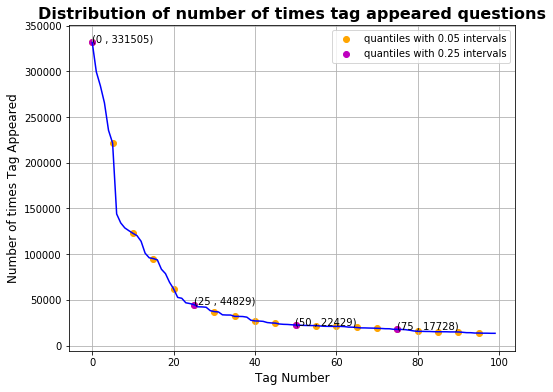

In [16]:
plt.figure(figsize = (8,6))
plt.plot(tags_freq_sorted['Frequency'][0:100].values, c = 'b')
plt.scatter(x = list(range(0,100,5)), y = tags_freq_sorted['Frequency'][0:100:5], c = "orange", label = "quantiles with 0.05 intervals")
plt.scatter(x = list(range(0,100,25)), y = tags_freq_sorted['Frequency'][0:100:25], c = "m", label = "quantiles with 0.25 intervals")

for x,y in zip(list(range(0,100,25)),tags_freq_sorted['Frequency'][0:100:25]):
    plt.annotate(s="({} , {})".format(x,y), xy = (x,y), xytext=(x-0.05, y+500))
    
plt.title('Distribution of number of times tag appeared questions', fontsize=16,fontweight = 'bold')
plt.xlabel("Tag Number", fontsize = 12)
plt.ylabel("Number of times Tag Appeared", fontsize = 12)
plt.legend()
plt.grid(True)
plt.show()

In [17]:
lst_tags_less_100 = tags_freq_sorted[tags_freq_sorted['Frequency']<=100].Tag
print("{} Tags are used less than 100 times".format(len(lst_tags_less_100)))

lst_tags_gt_1k = tags_freq_sorted[tags_freq_sorted['Frequency']>1000].Tag
print("{} Tags are used more than 1000 times".format(len(lst_tags_gt_1k)))

lst_tags_gt_10k = tags_freq_sorted[tags_freq_sorted['Frequency']>10000].Tag
print("{} Tags are used more than 10000 times".format(len(lst_tags_gt_10k)))

lst_tags_gt_100k = tags_freq_sorted[tags_freq_sorted['Frequency']>100000].Tag
print("{} Tags are used more than 100000 times".format(len(lst_tags_gt_100k)))

33808 Tags are used less than 100 times
1557 Tags are used more than 1000 times
153 Tags are used more than 10000 times
14 Tags are used more than 100000 times


<b>Observations:</b><br />
1. There are total of 42k unique tags.
2. Distribution of number of times tag appeared questions is highly positive skewed(almost looks like Power law Distribution.)
3. There are total 153 tags which are used more than 10000 times.
4. 14 tags are used more than 100000 times.
5. There are total 33808 tags which are used less than 100 times.
6. Since some tags occur much more frequenctly than others, Micro-averaged F1-score is the appropriate performence metric for this probelm.

### 3.2.5 Tags Per Question

In [18]:
#Storing the count of tag in each question in list 'tags_per_ques'
tags_per_ques = tags_vector.sum(axis = 1).tolist()
#Converting each value in the 'tags_per_ques' to integer.
tags_per_ques  = [int(j) for i in tags_per_ques for j in i]
print("Number of questions :",len(tags_per_ques))

Number of questions : 4206307


In [19]:
print("Maximum number of Tags per question :",max(tags_per_ques))
print("Minimum number of Tags per question :",min(tags_per_ques))
print("Average number of Tags per question :",np.round(sum(tags_per_ques)/len(tags_per_ques),3))

Maximum number of Tags per question : 5
Minimum number of Tags per question : 1
Average number of Tags per question : 2.899


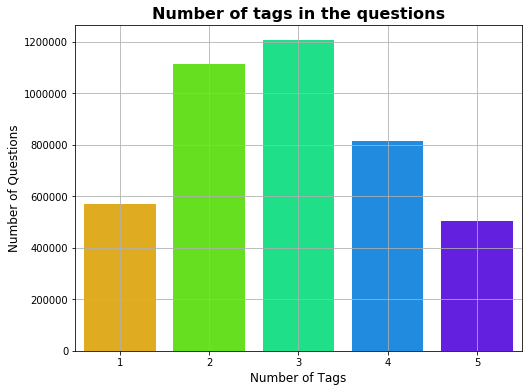

In [20]:
plt.figure(figsize = (8,6))
sns.countplot(tags_per_ques,palette = 'gist_rainbow')
plt.title("Number of tags in the questions", fontsize = 16, fontweight = 'bold')
plt.xlabel("Number of Tags",fontsize = 12)
plt.ylabel("Number of Questions",fontsize = 12)
plt.grid(True)
plt.show()

<b>Observations:</b><br />
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899(~3)
4. Most of the questions are having 2 or 3 tags

### 3.2.6 Most Frequent Tags

In [21]:
#convert the 'result' dictionary to 'list of tuples'
tup = dict(result.items())

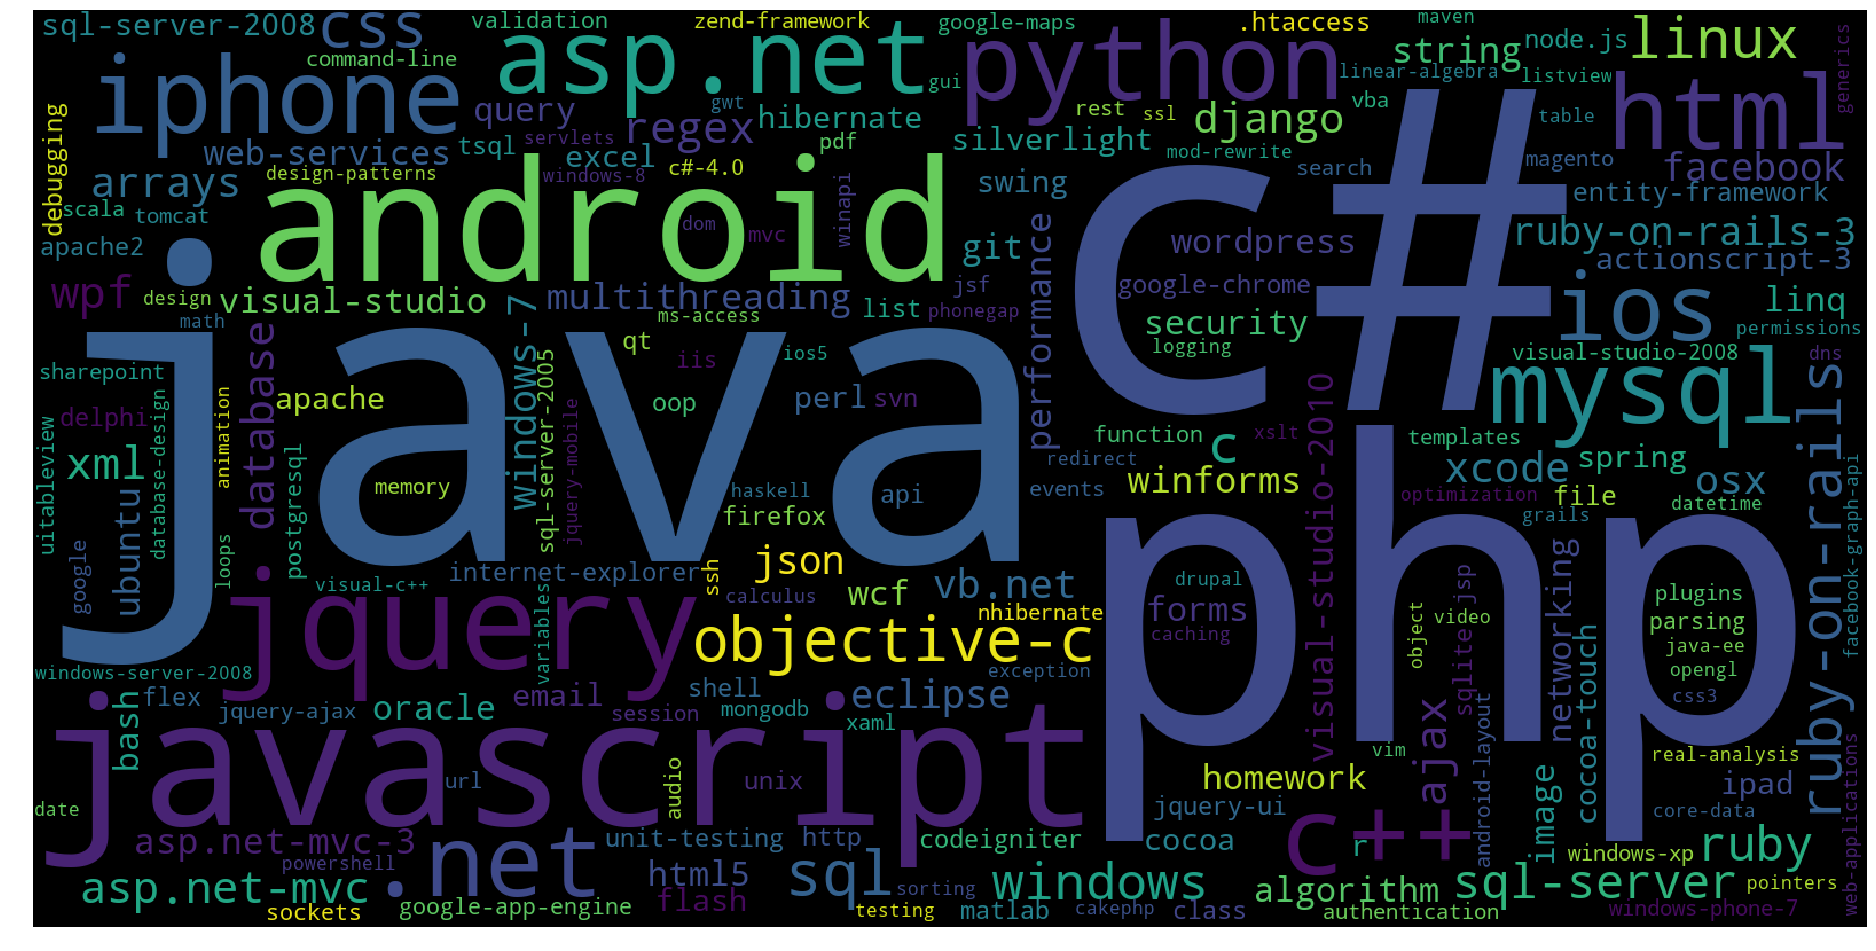

In [32]:
#Wordcloud of all tags 
wordcloud = WordCloud(background_color='black',
                      width=1600,
                      height=800).generate_from_frequencies(tup)

fig = plt.figure(figsize=(26,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
fig.savefig("tag.png")
plt.show()

### 3.2.7The top 30 tags

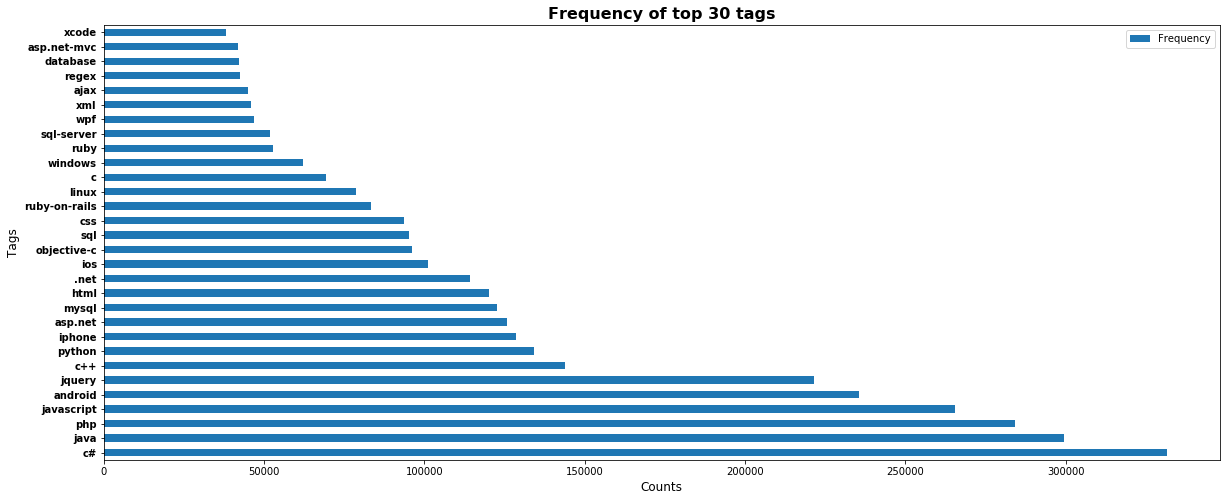

In [31]:
tags_freq_sorted.head(30).plot(kind='barh',figsize=(20,8))
plt.title('Frequency of top 30 tags',fontsize = 16, fontweight = 'bold')
plt.yticks(np.arange(30), tags_freq_sorted['Tag'],fontweight = 'bold')
plt.xlabel('Counts',fontsize = 12)
plt.ylabel('Tags',fontsize = 12)
plt.show()

<b>Observations:</b><br />
1. Majority of the most frequent tags are programming language.
2. C#, java and php are the top most frequent programming languages.
3. Android, IOS, Linux and windows are among the top most frequent operating systems.

# 4. DATA PREPROCESSING OF QUESTIONS

## 4.1 Preprocessing of questions(0.5M data points)

<ol> 
    <li> Separating Code from Body </li>
    <li> Remove Special/unwanted/punctuations characters from Question title and description (not in code)</li>
    <li> <b> Giving more weightage to title : Adding title three times to the question </b> </li>
    <li> Removing stop words (Except 'C' as 'C' is a programming language) </li>
    <li> Removing HTML Tags </li>
    <li> Convert all the characters into lowercase </li>
    <li> Use SnowballStemmer to stem the words </li>
</ol>

In [10]:
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

def create_table(conn, create_table_sql):
    """ create a table from the create_table_sql statement
    :param conn: Connection object
    :param create_table_sql: a CREATE TABLE statement
    :return:
    """
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

def create_database_table(database, query):
    conn = create_connection(database)
    if conn is not None:
        create_table(conn, query)
        checkTableExists(conn)
    else:
        print("Error! cannot create the database connection.")
    conn.close()

sql_create_table = """CREATE TABLE IF NOT EXISTS QuestionsProcessed (question text NOT NULL, code text, tags text, words_pre integer, words_post integer, is_code integer);"""
create_database_table("3times_weighted_Title.db", sql_create_table)

Tables in the databse:
QuestionsProcessed


In [11]:
read_db = 'train_no_dup.db'
write_db = '3times_weighted_Title.db'

if os.path.isfile(read_db):
    conn_r = sqlite3.connect(read_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        # for selecting first 0.5M rows
        reader.execute('''SELECT Title, Body, Tags From no_dup_train LIMIT 500001''')
        
        
if os.path.isfile(write_db):
    conn_w = create_connection(write_db)
    if conn_w is not None:
        tables = checkTableExists(conn_w)
        writer =conn_w.cursor()
        if tables != 0:
            writer.execute("DELETE FROM QuestionsProcessed WHERE 1")
            print("Cleared All the rows")

Tables in the databse:
QuestionsProcessed
Cleared All the rows


In [15]:
def clean_html(data):
    
    clean = re.compile('<.*?>')
    cleantext = re.sub(clean, ' ', str(data))
    return cleantext

stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer("english")

In [16]:
start = dt.now()
preprocessed_data_list=[]
reader.fetchone()
questions_with_code=0
len_pre=0
len_post=0
questions_proccesed = 0
for row in reader:
    
    is_code = 0
    
    title, question, tags = row[0], row[1], str(row[2])
    
    if '<code>' in question:
        questions_with_code+=1
        is_code = 1
    x = len(question)+len(title)
    len_pre+=x
    
    code = str(re.findall(r'<code>(.*?)</code>', question, flags=re.DOTALL))
    
    question=re.sub('<code>(.*?)</code>', '', question, flags=re.MULTILINE|re.DOTALL)
    question=clean_html(question.encode('utf-8'))
    title=title.encode('utf-8')
    
    # adding three times weightage to title to the data
    # add tags string to the training data
    question = str(title)+" "+str(title)+" "+str(title)+" "+question

    question=re.sub(r'[^A-Za-z0-9#+.\-]+',' ',question)
    words=word_tokenize(str(question.lower()))
    
    
    #Removing all single letter and and stopwords from question exceptt for the letter 'c'(as "c" is a programming language)
    question=' '.join(str(stemmer.stem(j)) for j in words if j not in stop_words and (len(j)!=1 or j=='c'))
    
    len_post+=len(question)
    tup = (question,code,tags,x,len(question),is_code)
    questions_proccesed += 1
    writer.execute("insert into QuestionsProcessed(question,code,tags,words_pre,words_post,is_code) values (?,?,?,?,?,?)",tup)
    if (questions_proccesed%50000==0):
        print("Number of questions completed=",questions_proccesed)

no_dup_avg_len_pre=(len_pre*1.0)/questions_proccesed
no_dup_avg_len_post=(len_post*1.0)/questions_proccesed

print( "Avg. length of questions(Title+Body) before processing: %d"%no_dup_avg_len_pre)
print( "Avg. length of questions(3*Times Title+Body) after processing: %d"%no_dup_avg_len_post)
print ("Percent of questions containing code: {} %".format((questions_with_code*100.0)/questions_proccesed))

print("Time taken to run this cell :", dt.now() - start)

Number of questions completed= 50000
Number of questions completed= 100000
Number of questions completed= 150000
Number of questions completed= 200000
Number of questions completed= 250000
Number of questions completed= 300000
Number of questions completed= 350000
Number of questions completed= 400000
Number of questions completed= 450000
Avg. length of questions(Title+Body) before processing: 1239
Avg. length of questions(3*Times Title+Body) after processing: 424
Percent of questions containing code: 57.066428265713064 %
Time taken to run this cell : 0:31:37.498390


In [17]:
#close the conections
conn_r.commit()
conn_w.commit()
conn_r.close()
conn_w.close()

### 4.1.1 Sample quesitons after preprocessing of data

In [18]:
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        reader =conn_r.cursor()
        reader.execute("SELECT question From QuestionsProcessed LIMIT 10")
        print("Questions after preprocessed")
        print('='*100)
        reader.fetchone()
        for row in reader:
            print(row)
            print('-'*100)
conn_r.commit()
conn_r.close()

Questions after preprocessed
('java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index java.sql.sqlexcept microsoft odbc driver manag invalid descriptor index use follow code display caus solv',)
----------------------------------------------------------------------------------------------------
('better way updat feed fb php sdk better way updat feed fb php sdk better way updat feed fb php sdk novic facebook api read mani tutori still confused.i find post feed api method like correct second way use curl someth like way better',)
----------------------------------------------------------------------------------------------------
('btnadd click event open two window record ad btnadd click event open two window record ad btnadd click event open two window record ad open window search.aspx use code hav add button search.aspx nwhen insert record btnadd click event open anoth window nafter insert record 

## 4.2 Saving Preprocessed data to a Database

In [19]:
#Taking 0.5 Million entries to a dataframe.
write_db = '3times_weighted_Title.db'
if os.path.isfile(write_db):
    conn_r = create_connection(write_db)
    if conn_r is not None:
        preprocessed_data = pd.read_sql_query("""SELECT question, Tags FROM QuestionsProcessed""", conn_r)
conn_r.commit()
conn_r.close()

In [3]:
print("Number of questions/datapoints: ",preprocessed_data.shape[0])
print("Number of dimensions: ",preprocessed_data.shape[1])
preprocessed_data.head()

Number of questions/datapoints:  499998
Number of dimensions:  2


,question,tags
0,java.lang.noclassdeffounderror javax servlet j...,jsp jstl
1,java.sql.sqlexcept microsoft odbc driver manag...,java jdbc
2,better way updat feed fb php sdk better way up...,facebook api facebook-php-sdk
3,btnadd click event open two window record ad b...,javascript asp.net web
4,sql inject issu prevent correct form submiss p...,php forms


# 5. Machine Learning Models

## 5.1 Converting tags for multilabel problems

This is the simplest technique, which basically treats each tag as a separate single class classification problem.
<br>

The problem is broken into <b>N</b> different single class classification problems as shown in the figure below.
<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/08/25230630/Screen-Shot-2017-08-21-at-1.46.00-AM.png" width="400" height="100">

In [4]:
# binary='true' will give a binary vectorizer
vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary = "True")
multilabel_binary_y = vectorizer.fit_transform(preprocessed_data['tags'])

## 5.2 Selecting 500 Tags
<b>We will sample the number of tags instead considering all of them (due to limitation of computing power)</b>

In [5]:
def tags_to_choose(n):
    t = multilabel_binary_y.sum(axis=0).tolist()[0]
    sorted_tags_i = sorted(range(len(t)), key=lambda i: t[i], reverse=True)
    multilabel_binary_yn=multilabel_binary_y[:,sorted_tags_i[:n]]
    return multilabel_binary_yn

def questions_explained_fn(n):
    multilabel_binary_yn = tags_to_choose(n)
    x= multilabel_binary_yn.sum(axis=1)
    return (np.count_nonzero(x==0))

In [6]:
questions_explained = []
total_tags = multilabel_binary_y.shape[1]
total_question = preprocessed_data.shape[0]

start = dt.now()
for i in range(500,total_tags,100):
    questions_explained.append(np.round(((total_question-questions_explained_fn(i))/total_question)*100,3))
print("Time taken to run this cell :",dt.now() - start)

Time taken to run this cell : 0:00:28.048188


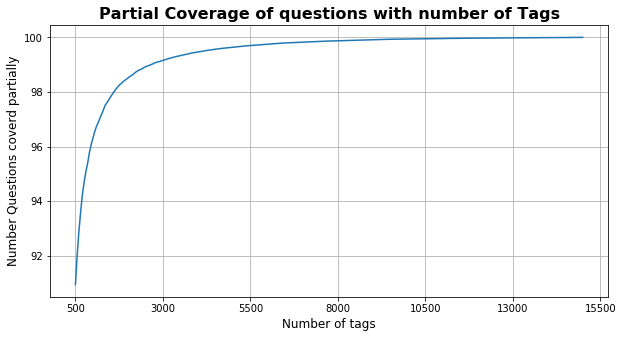

With  5500 tags we are covering  99.157 % of questions
With  500 tags we are covering  90.956 % of questions


In [7]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(questions_explained)
xlabel = list(500+np.array(range(-50,450,50))*50)
ax.set_xticklabels(xlabel)
plt.title("Partial Coverage of questions with number of Tags",fontsize = 16,fontweight = 'bold')
plt.xlabel("Number of tags",fontsize = 12)
plt.ylabel("Number Questions coverd partially",fontsize = 12)
plt.grid()
plt.show()


print("With ",5500,"tags we are covering ",questions_explained[50],"% of questions")
print("With ",500,"tags we are covering ",questions_explained[0],"% of questions")

In [8]:
multilabel_yx = tags_to_choose(500)
print("Number of questions that are not covered : {}({} %) out  of  {}".format(questions_explained_fn(500),(questions_explained_fn(500)*100)/total_question,total_question))

Number of questions that are not covered : 45221(9.044236176944707 %) out  of  499998


## 5.3 Split the data into Train and Test (80:20)

In [9]:
train_data_size = 400000
X_train = preprocessed_data.head(train_data_size)
X_test  = preprocessed_data.tail(preprocessed_data.shape[0] - train_data_size)

y_train = multilabel_yx[0:train_data_size,:]
y_test = multilabel_yx[train_data_size:preprocessed_data.shape[0],:]

In [10]:
print("No of datapoints in Train data: ",y_train.shape)
print("No of datapoints in Train data: ",y_test.shape)

No of datapoints in Train data:  (400000, 500)
No of datapoints in Train data:  (99998, 500)


## 5.4 Featurizing data using Bag of Words(up to 4 grams)

In [ ]:
start = dt.now()
vectorizer = CountVectorizer(min_df = 0.00009,
                            max_features = 200000,
                            ngram_range = (1,4),
                            tokenizer = lambda x: x.split())
X_train_multilabel = vectorizer.fit_transform(X_train['question'])
X_test_multilabel = vectorizer.transform(X_test['question'])

print("Time taken to run this cell :",dt.now() - start)

Time taken to run this cell : 0:08:14.824099


### 5.4.1 Standardiztaion of data

In [ ]:
sc = StandardScaler(with_mean=False)
X_train_multilabel = sc.fit_transform(X_train_multilabel)

In [ ]:
X_test_multilabel = sc.transform(X_test_multilabel)

In [12]:
print("Dimensions of Train data X: ",X_train_multilabel.shape,"Y: ",y_train.shape)
print("Dimensions of Test data X: ",X_test_multilabel.shape,"Y: ",y_test.shape)

Dimensions of Train data X:  (400000, 95586) Y:  (400000, 500)
Dimensions of Test data X:  (99998, 95586) Y:  (99998, 500)


## 5.5 OneVsRestClassifier  with Logistic Regression </h3>

### 5.5.1 Grid Search to find the best hyperparameter(C)

Grid Scores for Model is:  [mean: 0.00000, std: 0.00000, params: {'estimator__C': 1e-05}, mean: 0.07428, std: 0.00863, params: {'estimator__C': 0.0001}, mean: 0.40514, std: 0.05061, params: {'estimator__C': 0.001}, mean: 0.50340, std: 0.03312, params: {'estimator__C': 0.01}, mean: 0.49722, std: 0.02535, params: {'estimator__C': 0.1}, mean: 0.48626, std: 0.02326, params: {'estimator__C': 1}]
Best Parameters:  {'estimator__C': 0.01}
Best Micro F1-Score: 0.503 


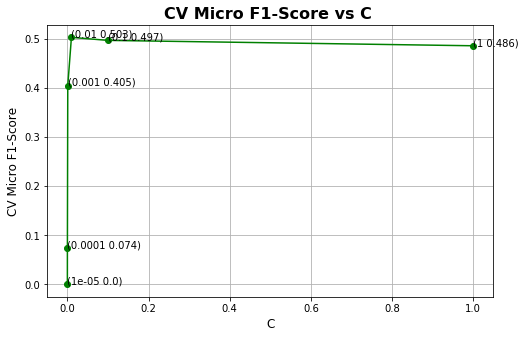

Time taken to train this model : 21:41:46.386448


['lr_with_more_title_weight.pkl']

In [15]:
warnings.filterwarnings('ignore')
start = dt.now()

C = [0.00001,0.0001,0.001,0.01,0.1,1]
param_lr = {
    "estimator__C":C
    }

classifier =OneVsRestClassifier(LogisticRegression(penalty='l1'),n_jobs = -1)
grid = GridSearchCV(classifier, param_grid = param_lr, cv = 3, scoring = "f1_micro")
lr_grid_estimator = grid.fit(X_train_multilabel,y_train)

best_C = lr_grid_estimator.best_params_

grid_mean_scores = [i.mean_validation_score for i in lr_grid_estimator.grid_scores_]
best_score = lr_grid_estimator.best_score_

print("Grid Scores for Model is: ",lr_grid_estimator.grid_scores_)
print("Best Parameters: ",best_C)
print("Best Micro F1-Score: {} ".format(np.round(best_score,3))) 


plt.figure(figsize = (8,5))
plt.plot(C,grid_mean_scores, 'g-o')
for xy in zip(C, np.round(grid_mean_scores,3)):
    plt.annotate('(%s %s)' % xy, xy = xy, textcoords = 'data')
plt.title("CV Micro F1-Score vs C ", fontsize=16, fontweight='bold')
plt.xlabel("C", fontsize=12)
plt.ylabel('CV Micro F1-Score', fontsize=12)
plt.grid(True)
plt.show()

print("Time taken to train this model :",dt.now() - start)


joblib.dump(lr_grid_estimator, "lr_with_more_title_weight.pkl")

In [20]:
start = dt.now()

y_pred = lr_grid_estimator.predict(X_test_multilabel)

print("Accuracy: ",np.round(accuracy_score(y_test,y_pred),3))
print("Hamming Loss: ",np.round(hamming_loss(y_test,y_pred),3))
print("Jaccard Similarity Score: ",np.round(jaccard_similarity_score(y_test,y_pred),3))

precision_micro_lr = precision_score(y_test, y_pred, average='micro')
recall_micro_lr = recall_score(y_test, y_pred, average='micro')
f1_micro_lr = f1_score(y_test, y_pred, average='micro')
 
print("\n\33[1mMicro-average quality numbers :\33[0m")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_micro_lr, recall_micro_lr, f1_micro_lr))

precision_macro_lr = precision_score(y_test, y_pred, average='macro')
recall_macro_lr = recall_score(y_test, y_pred, average='macro')
f1_macro_lr = f1_score(y_test, y_pred, average='macro')
 
print("\n\33[1mMacro-average quality numbers :\33[0m")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_macro_lr, recall_macro_lr, f1_macro_lr))

print("\n\33[1mClassification Report of All Tags :\33[0m")
print(classification_report(y_test, y_pred))
print("Time taken to predict on Test Data :", dt.now() - start)

Accuracy:  0.233
Hamming Loss:  0.003
Jaccard Similarity Score:  0.383

Micro-average quality numbers :
Precision: 0.6609, Recall: 0.3545, F1-measure: 0.4614

Macro-average quality numbers :
Precision: 0.4938, Recall: 0.2795, F1-measure: 0.3482

Classification Report of All Tags :
             precision    recall  f1-score   support

          0       0.94      0.68      0.79      5519
          1       0.61      0.34      0.44      8189
          2       0.75      0.41      0.53      6529
          3       0.78      0.47      0.59      3231
          4       0.75      0.44      0.56      6430
          5       0.74      0.39      0.51      2878
          6       0.83      0.53      0.64      5086
          7       0.83      0.57      0.68      4533
          8       0.50      0.16      0.24      3000
          9       0.78      0.53      0.63      2765
         10       0.52      0.21      0.30      3051
         11       0.66      0.38      0.48      3009
         12       0.57      

## 5.6 OneVsRestClassifier  with Linear-SVM (SGDClassifier with loss-hinge)

### 5.6.1 Grid Search to find the best hyperparameter(alpha)

Grid Scores for Model is:  [mean: 0.28303, std: 0.00614, params: {'estimator__alpha': 1e-05}, mean: 0.27493, std: 0.00422, params: {'estimator__alpha': 0.0001}, mean: 0.24736, std: 0.00372, params: {'estimator__alpha': 0.001}, mean: 0.21252, std: 0.01492, params: {'estimator__alpha': 0.01}, mean: 0.05166, std: 0.00397, params: {'estimator__alpha': 0.1}, mean: 0.00458, std: 0.00099, params: {'estimator__alpha': 1}]
Best Parameters:  {'estimator__alpha': 1e-05}
Best Micro F1-Score: 0.283 


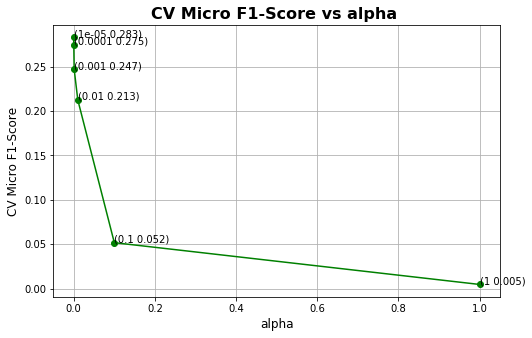

Time taken to train this model : 2:14:40.575954


['svmlin_with_more_title_weight.pkl']

In [13]:
warnings.filterwarnings('ignore')
start = dt.now()

alpha = [0.00001,0.0001,0.001,0.01,0.1,1]
param_svm = {
    "estimator__alpha":alpha
    }

classifier = OneVsRestClassifier(SGDClassifier(loss = "hinge",penalty = 'l1'),n_jobs = -1)
grid = GridSearchCV(classifier, param_grid = param_svm, cv = 3, scoring = "f1_micro")
grid_estimator_linsvm = grid.fit(X_train_multilabel,y_train)

best_alpha = grid_estimator_linsvm.best_params_

grid_mean_scores = [i.mean_validation_score for i in grid_estimator_linsvm.grid_scores_]
best_score = grid_estimator_linsvm.best_score_

print("Grid Scores for Model is: ",grid_estimator_linsvm.grid_scores_)
print("Best Parameters: ",best_alpha)
print("Best Micro F1-Score: {} ".format(np.round(best_score,3))) 


plt.figure(figsize = (8,5))
plt.plot(alpha,grid_mean_scores, 'g-o')
for xy in zip(alpha, np.round(grid_mean_scores,3)):
    plt.annotate('(%s %s)' % xy, xy = xy, textcoords = 'data')
plt.title("CV Micro F1-Score vs alpha ", fontsize=16, fontweight='bold')
plt.xlabel("alpha", fontsize=12)
plt.ylabel('CV Micro F1-Score', fontsize=12)
plt.grid(True)
plt.show()

print("Time taken to train this model :",dt.now()-start)

joblib.dump(grid_estimator_linsvm, "svmlin_with_more_title_weight.pkl")

In [21]:
start = dt.now()

y_pred2 = grid_estimator_linsvm.predict(X_test_multilabel)

print("Accuracy: ",np.round(accuracy_score(y_test,y_pred2),3))
print("Hamming Loss: ",np.round(hamming_loss(y_test,y_pred2),3))
print("Jaccard Similarity Score: ",np.round(jaccard_similarity_score(y_test,y_pred2),3))

precision_micro = precision_score(y_test, y_pred2, average='micro')
recall_micro = recall_score(y_test, y_pred2, average='micro')
f1_micro = f1_score(y_test, y_pred2, average='micro')
 
print("\n\33[1mMicro-average quality numbers :\33[0m")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_micro, recall_micro, f1_micro))

precision_macro = precision_score(y_test, y_pred2, average='macro')
recall_macro = recall_score(y_test, y_pred2, average='macro')
f1_macro = f1_score(y_test, y_pred2, average='macro')
 
print("\n\33[1mMacro-average quality numbers :\33[0m")
print("Precision: {:.4f}, Recall: {:.4f}, F1-measure: {:.4f}".format(precision_macro, recall_macro, f1_macro))

print("\n\33[1mClassification Report of All Tags :\33[0m")
print(classification_report(y_test, y_pred2))
print("Time taken to predict on Test Data :", dt.now() - start)

Accuracy:  0.079
Hamming Loss:  0.008
Jaccard Similarity Score:  0.245

Micro-average quality numbers :
Precision: 0.2144, Recall: 0.4365, F1-measure: 0.2876

Macro-average quality numbers :
Precision: 0.1562, Recall: 0.3538, F1-measure: 0.2099

Classification Report of All Tags :
             precision    recall  f1-score   support

          0       0.52      0.78      0.62      5519
          1       0.32      0.49      0.39      8189
          2       0.36      0.50      0.42      6529
          3       0.35      0.59      0.44      3231
          4       0.42      0.53      0.47      6430
          5       0.27      0.50      0.35      2878
          6       0.43      0.57      0.49      5086
          7       0.48      0.62      0.54      4533
          8       0.14      0.27      0.18      3000
          9       0.46      0.62      0.53      2765
         10       0.24      0.35      0.28      3051
         11       0.35      0.48      0.40      3009
         12       0.28      

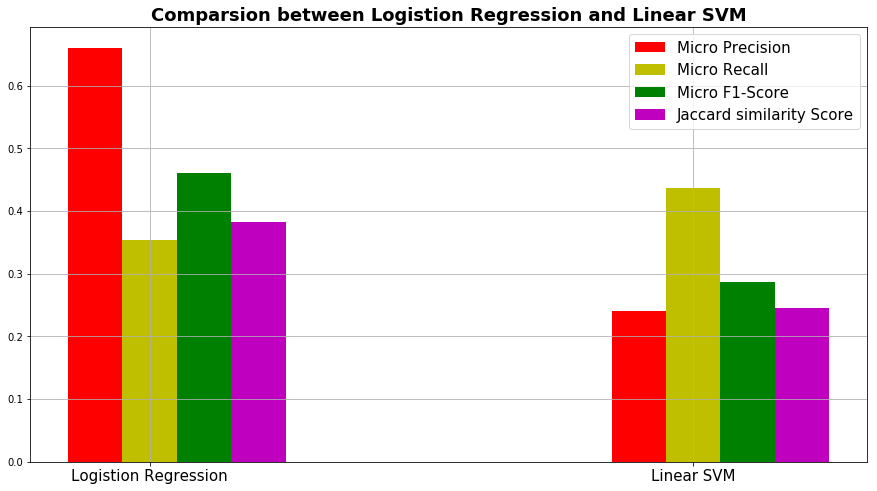

In [55]:
N = 2
fig, ax = plt.subplots(figsize=(15,8))

micro_precision = (0.6609, 0.240)
ind = np.arange(N)
width = 0.1
p1 = ax.bar(ind, micro_precision, width, color='r')

micro_recall = (0.3545,0.4365)
p2 = ax.bar(ind + width, micro_recall, width,
            color='y')

micro_f1score= (0.4614,0.2876)
p3 = ax.bar(ind + width*2, micro_f1score, width,
            color='g')

jaccard_score = (0.383,0.245)
p4 = ax.bar(ind + width*3, jaccard_score, width,
            color='m')

ax.set_title('Comparsion between Logistion Regression and Linear SVM',fontsize=18,fontweight='bold')
ax.set_xticks(ind + width)
ax.set_xticklabels(('Logistion Regression', 'Linear SVM'),fontsize=15)
ax.legend((p1[0], p2[0], p3[0], p4[0]), ('Micro Precision', 'Micro Recall', 'Micro F1-Score', 'Jaccard similarity Score'),fontsize=15)
plt.grid()
plt.show()

# 6. CONCLUSION

## 6.1 Steps Followed
-  The data is loaded using sqlite database.
-  Any duplicates or missing values, if found in data are dropped.
-  Exploratory data analysis is performed on data ie Number of Unique Tags,Distribution of number of times tag apperaed questions, Tags per each question, most frequent Tags etc.
-  Preprocessing and cleaning of only 0.5 million questions(like html removal,stemming,removal of stop words etc) is performed and stored in database.
-  We convert the tags for multilabel problems(binary outputs and One vs Rest Classifier approach).
-  We sample the number of tags to 500 instead considering all of them (due to limitation of computing power),by looking at the partial covergae of questions covered by 500 tags(~ 90 %).
-  We split the data into Train and Test in 80:20 ratio.
-  We featurize the input data using Bag of Words(up to 4 grams).
-  We also perform standardization on the featurized input data.
-  Since its a multilabel classification problem, micro f1-score and hamming loss are chosen as performance metrics.
-  We chose models like OneVsRestClassifier  with Logistic Regression and OneVsRestClassifier  with Linear-SVM (SGDClassifier with loss-hinge) to find the performance on Test data.
-  Best hyperparameters for each model is found using Grid Search Cross validation.(Here we chose 3 fold cross validation.)
-  Both the models are compared based on the performance metrics chosen for multilabel classification.

## 6.2 Comparsion of Models

| ML Model | <b>Best Hyperparameter</b> | <b>Micro Precission</b> | <b>Micro Recall</b> | <b>Micro F1-score</b> | <b>Hamming Loss</b> | <b>Jaccard Similarity Score</b> |
| --- | --- | --- | --- | --- | --- | --- |
| <b>Logistic Regression</b> | C = 0.01 | 0.6609  | 0.3545 | 0.4614 | 0.003 | 0.383 |
| <b>SGD Classifier(hinge loss)</b> | alpha = 0.00001 | 0.2144  | 0.4365 | 0.2876 | 0.008 | 0.245 |

<b>1 - </b><b>Logistic Regression</b> outperforms Linear SVM(SGD Classifier(hinge loss)) with best Micro F1-score of <b>0.4614</b>.